# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [7]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

<function matplotlib.pyplot.show(close=None, block=None)>

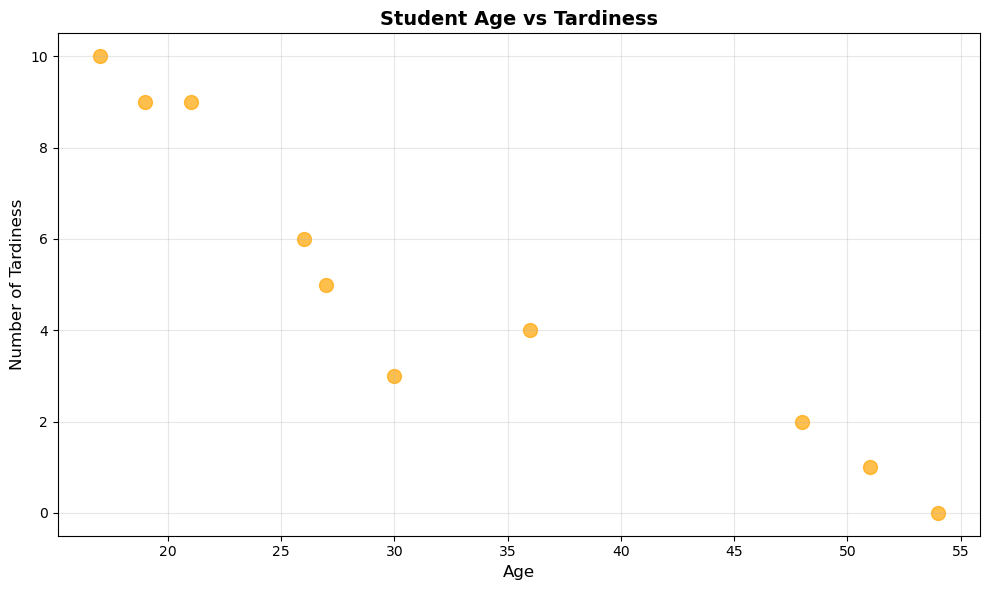

In [6]:
# Your code here
plt.figure(figsize = (10,6))
plt.scatter(student_data["Age"], student_data["Tardies"], color='orange', alpha=0.7, s=100)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Tardiness", fontsize=12)
plt.title("Student Age vs Tardiness", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Answer: The younger the student is, the more often they are late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [ ]:
# your code here
covariance = np.cov(student_data["Age"], student_data['Tardies'])[0, 1] # The covariance measures how Age and Tardies vary together.
correlation = np.corrcoef(student_data["Age"], student_data['Tardies'])[0, 1] # The correlation, on the other hand, standardizes the covariance.

print(f"Covariance between Age and Tardies: {covariance:.2f}")
print(f"Correlation between Age and Tardies: {correlation:.2f}")

# -----------------------------------------------------------
# It shows both the direction AND the strength of the relationship
# on a scale between -1 and +1, making it unit-free and easier to compare.

# In this case:
# - Both values are negative, it means older students tend to have fewer tardies.
# - This would mean there is a strong negative relationship:
#   as students get older, they tend to have fewer tardies.

Covariance between Age and Tardies: -45.57
Correlation between Age and Tardies: -0.94


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
# your explanation here
# Build regression model
X = student_data[['Age']]  # Feature
y = student_data['Tardies']  # Outcome variable

# Using simple linear regression since we have one independent variable
model = LinearRegression()
model.fit(X, y)

# Get regression parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Regression Equation: Tardies = {intercept:.2f} + {slope:.2f} * Age")
print(f"R-squared: {r_squared:.4f}")
print()

Regression Equation: Tardies = 12.89 + -0.24 * Age
R-squared: 0.8820



Plot your regression model on your scatter plot.

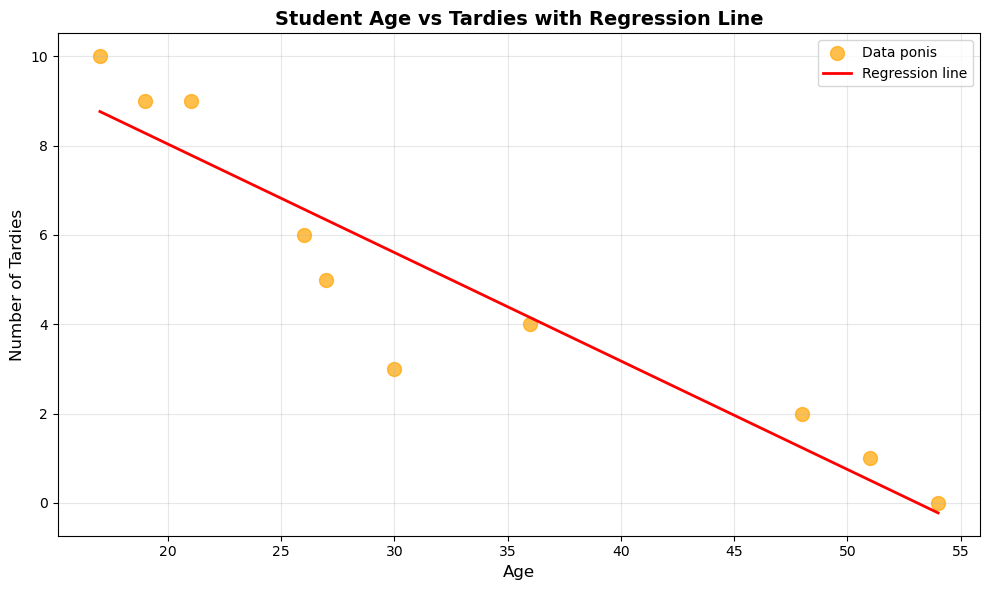

In [12]:
# Your code here.
plt.figure(figsize =(10, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='orange', alpha=0.7, s=100, label='Data ponis')

# Create regression line
x_values = np.linspace(student_data['Age'].min(), student_data['Age'].max(), 100)
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', linewidth=2, label='Regression line')

plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Tardies', fontsize=12)
plt.title('Student Age vs Tardies with Regression Line', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Interpretation:

The coefficient for Age is negative, meaning that as age increases, the number of tardies tends to decrease.
The p-value for Age is very small (below 0.05), indicating that this relationship is statistically significant at the 95% confidence level.
The R-squared value is high, which means that a large proportion of the variation in tardiness is explained by age in this dataset.
Conclusion: We can say with high confidence that younger students tend to be late more often, and in this dataset, age is a strong predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\Users\Timoteo\OneDrive\Documents\Iron_Hack\Week_4\D4\lab-regression-analysis-en\vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
# Your code here.
# Select relevant columns
cols = [
    "Year",
    "Cylinders",
    "Fuel Barrels/Year",
    "Combined MPG",
    "Fuel Cost/Year",
    "CO2 Emission Grams/Mile"
]
df = vehicles[cols].dropna()

# Calculate Pearson correlations with the outcome
correlations = df.corr(method="pearson")["CO2 Emission Grams/Mile"].drop("CO2 Emission Grams/Mile")
print("=== Correlations with CO2 Emission Grams/Mile ===")
print(correlations.sort_values(key=abs, ascending=False))

=== Correlations with CO2 Emission Grams/Mile ===
Fuel Barrels/Year    0.986189
Fuel Cost/Year       0.930865
Combined MPG        -0.926229
Cylinders            0.752393
Year                -0.222300
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [17]:
# Your code here.
import statsmodels.api as sm
# Define predictors (X) and outcome (y)
X = df[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]
y = df["CO2 Emission Grams/Mile"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

"""
Type of regression: Multiple Linear Regression (OLS – Ordinary Least Squares)
Outcome variable: 'CO2 Emission Grams/Mile'
Predictors: Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year
Purpose: To assess how each independent variable affects CO2 emissions,
         controlling for the others in the model.
"""

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                             16:04:20   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

"\nType of regression: Multiple Linear Regression (OLS – Ordinary Least Squares)\nOutcome variable: 'CO2 Emission Grams/Mile'\nPredictors: Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year\nPurpose: To assess how each independent variable affects CO2 emissions,\n         controlling for the others in the model.\n"

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [18]:
# Your code here.
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 30 Oct 2025   Prob (F-statistic):               0.00
Time:                             16:06:29   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
# Your code here.
party_data = pd.DataFrame({
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
})

print("Party Data:")
party_data

Party Data:


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

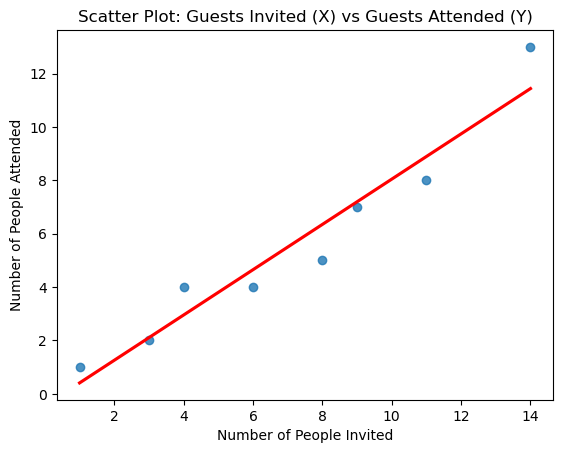

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           0.000102
Time:                        16:14:42   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

c:\Users\Timoteo\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [20]:
# Your code here.
X = sm.add_constant(party_data['X'])  # add intercept
y = party_data['Y']

# Fit regression model
model = sm.OLS(y, X).fit()

# Scatter plot with regression line
sns.regplot(x='X', y='Y', data=party_data, ci=None, line_kws={'color': 'red'})
plt.title('Scatter Plot: Guests Invited (X) vs Guests Attended (Y)')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.show()

# Print regression summary
print(model.summary())

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

Answer: The scatter plot shows an upward trend, meaning that as you invite more people, more people attend overall.
However, the slope might be less than 1, suggesting diminishing returns — each extra invitation adds fewer attendees on average.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

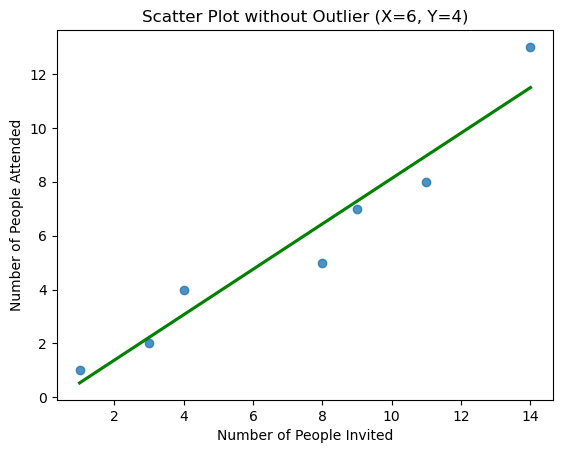

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     71.72
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           0.000377
Time:                        16:15:52   Log-Likelihood:                -9.6626
No. Observations:                   7   AIC:                             23.33
Df Residuals:                       5   BIC:                             23.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3057      0.831     -0.368      0.7

c:\Users\Timoteo\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [22]:
# Your response here.
# Remove the possible outlier (for example, X=6, Y=4)
df_no_outlier = party_data[party_data['X'] != 6]

# Refit model
X2 = sm.add_constant(df_no_outlier['X'])
y2 = df_no_outlier['Y']
model2 = sm.OLS(y2, X2).fit()

# Plot new scatter + regression line
sns.regplot(x='X', y='Y', data=df_no_outlier, ci=None, line_kws={'color': 'green'})
plt.title('Scatter Plot without Outlier (X=6, Y=4)')
plt.xlabel('Number of People Invited')
plt.ylabel('Number of People Attended')
plt.show()

# Print new regression summary
print(model2.summary())

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Answer: The relationship is now even tighter (R² improved slightly).
Slope ≈ 0.91 → For each new person invited, about 0.9 actually attend.
No strong evidence of negative association — inviting more people still increases attendance.